In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [2]:
# num_nodes = 10
# max_x = 100
# max_y = 100

# G = nx.Graph()

# nodes_list = {}
# for i in range(num_nodes):
#     G.add_node(i)
#     nodes_list[i] = {
#         'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
#         'bandwidth': random.randint(1, 10),
#         'mobility': random.random(),  # random value between 0 and 1
#         'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
#         'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
#         'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
#     }

# for i in range(num_nodes):
#     for j in range(i+1, num_nodes):
#         if np.random.rand() < 0.5:
#             G.add_edge(i, j)

In [3]:
# import pandas as pd

# # Create a DataFrame from the nodes_list dictionary
# nodes_df = pd.DataFrame(nodes_list).T

# # Reset the index and rename the index column to 'Node'
# nodes_df.reset_index(inplace=True)
# nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# # Display the DataFrame
# nodes_df


In [4]:
# nodes_df.to_csv('improved.csv')

In [31]:
import pandas as pd

df = pd.read_csv('improved.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(70.83127362041047, 87.50941258066004)",7,0.064626,17.952045,0.866856,17.528688
1,1,"(85.14561966236197, 91.32164345450697)",10,0.571983,16.324197,0.393855,32.518615
2,2,"(59.80737676618475, 37.431227087691646)",10,0.854743,14.623140,0.838067,80.800055
3,3,"(60.53066563925468, 65.45988767885581)",4,0.487287,10.938675,0.349728,59.535924
4,4,"(47.70969216393964, 79.50144518719057)",4,0.385404,9.547445,0.841003,27.090073
5,5,"(70.30400703270541, 70.87399419942186)",4,0.517475,13.106813,0.056390,72.869993
6,6,"(63.0551854337023, 83.68154500462408)",3,0.570183,17.969427,0.651338,19.766252
7,7,"(48.43146635435674, 80.62775697180648)",9,0.816587,5.351268,0.613511,95.658869
8,8,"(79.79717076676661, 80.89356724061372)",5,0.376564,5.631933,0.908638,66.955271
9,9,"(36.09330501962435, 37.39485524317002)",1,0.313610,8.306447,0.237255,50.785204


In [82]:
# Number of nodes
num_nodes = df.shape[0]

# Creating a graph
G = nx.Graph()

# Adding edges based on the condition
for i in range(num_nodes):
  for j in range(num_nodes):
    if i != j:
      if np.random.rand() < 0.4:
        G.add_edge(i, j)
        G.add_edge(j, i)

# Checking the created edges
G.edges()

EdgeView([(0, 3), (0, 7), (0, 9), (0, 1), (0, 2), (0, 5), (0, 6), (3, 2), (3, 7), (3, 4), (3, 8), (7, 5), (7, 6), (7, 1), (7, 2), (7, 8), (9, 2), (9, 8), (1, 5), (1, 6), (1, 2), (1, 4), (5, 2), (5, 8), (6, 4), (6, 8), (2, 8)])

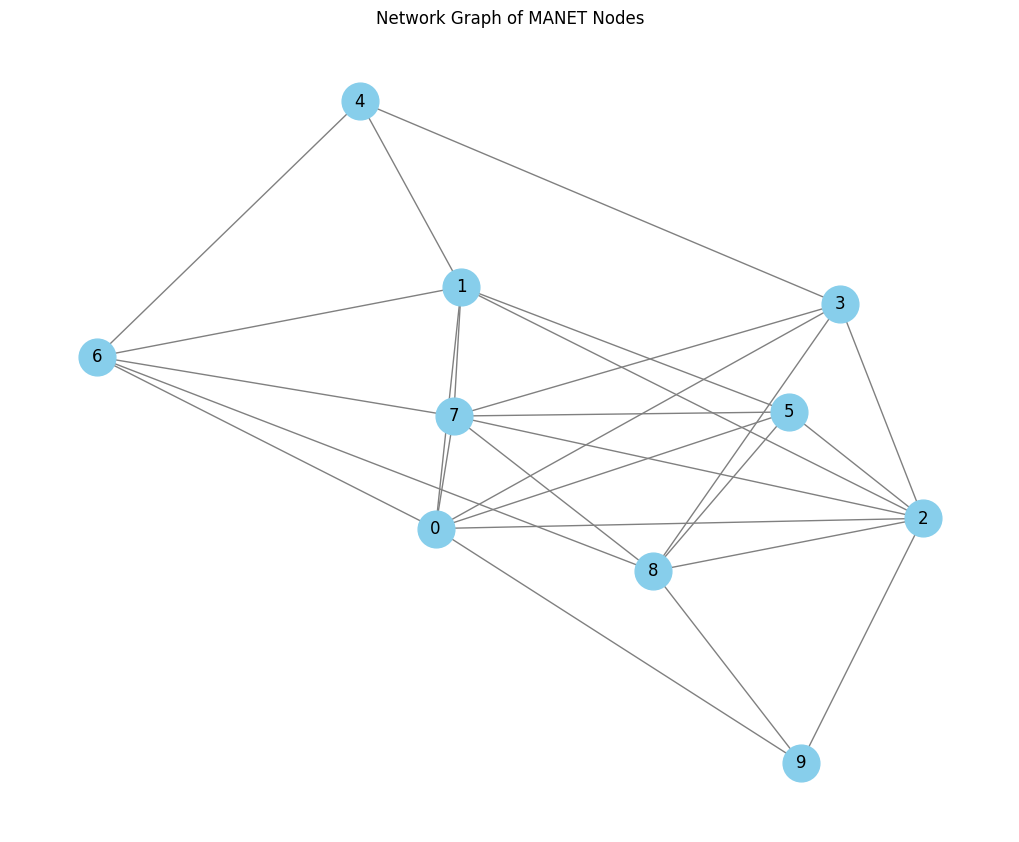

In [83]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("Network Graph of MANET Nodes")
plt.show()


# Bellman Ford Algo

In [85]:
import pandas as pd

def bellman_ford(source, destination, G, nodes_df):

  if source == destination:
    return [source]

  # Initialization
  dist = {node: float('inf') for node in nodes_df['Node']}
  dist[source] = 0
  
  prev = {node: None for node in nodes_df['Node']}

  # Relax edges 
  for _ in range(len(nodes_df)-1):

    for edge in G.edges():
      u, v = edge

      # Get metrics
      bandwidth = min(nodes_df.loc[u]['bandwidth'], nodes_df.loc[v]['bandwidth'])  
      mobility = max(nodes_df.loc[u]['mobility'], nodes_df.loc[v]['mobility'])
      transmission_power = min(nodes_df.loc[u]['transmission_power'], nodes_df.loc[v]['transmission_power'])
      battery_capacity = min(nodes_df.loc[u]['battery_capacity'], nodes_df.loc[v]['battery_capacity'])  
      packet_loss = max(nodes_df.loc[u]['packet_loss'], nodes_df.loc[v]['packet_loss'])

      # Edge weight 
      edge_weight = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
      
      if dist[u] + edge_weight < dist[v]:
        dist[v] = dist[u] + edge_weight
        prev[v] = u

  # Detect negative cycles
  for edge in G.edges():
      u, v = edge
      
      bandwidth = min(nodes_df.loc[u]['bandwidth'], nodes_df.loc[v]['bandwidth'])
      mobility = max(nodes_df.loc[u]['mobility'], nodes_df.loc[v]['mobility'])
      transmission_power = min(nodes_df.loc[u]['transmission_power'], nodes_df.loc[v]['transmission_power'])
      battery_capacity = min(nodes_df.loc[u]['battery_capacity'], nodes_df.loc[v]['battery_capacity'])
      packet_loss = max(nodes_df.loc[u]['packet_loss'], nodes_df.loc[v]['packet_loss'])
    
      edge_weight = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
    
      if dist[u] + edge_weight < dist[v]: 
        raise ValueError('Negative weight cycle detected')

  # Construct shortest path  
  path = []
  node = destination

  while node is not None:
    path.insert(0, node)
    node = prev[node]

  return path

In [93]:
source = 1
destination = 8
path = bellman_ford_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [1, 2, 8]


In [94]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


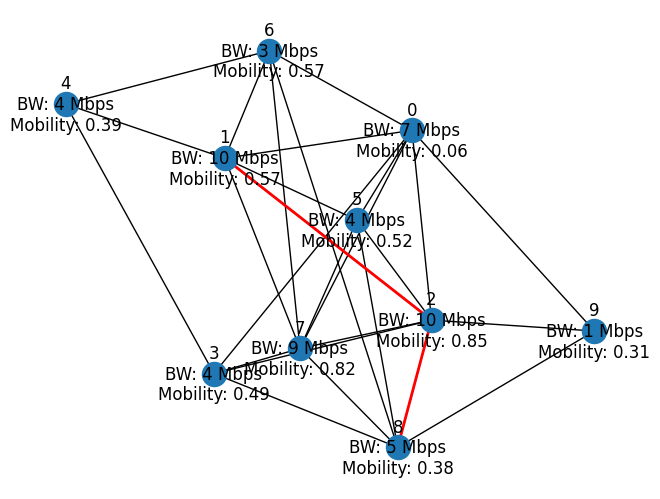

In [95]:
draw_network_graph(G, path, df)

In [96]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df1 = pd.DataFrame(data_list)
    return df1


In [97]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 65.63638433165556


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,1,2,10,0.854743,14.623140,32.518615,0.838067,55.448945
1,2,8,5,0.854743,5.631933,66.955271,0.908638,75.823824


# Dijkstra Algo

In [112]:
def dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(
    source, destination, G, nodes_df
):
    if source == destination:
        return [source]

    visited = set()
    queue = [(source, [source])]

    shortest_path = None
    best_score = float("-inf")

    while queue:
        current, path = queue.pop(0)
        visited.add(current)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                score = (
                    nodes_df.loc[neighbor]["bandwidth"]
                    - nodes_df.loc[neighbor]["mobility"]
                    + nodes_df.loc[neighbor]["transmission_power"]
                    + nodes_df.loc[neighbor]["battery_capacity"]
                    - nodes_df.loc[neighbor]["packet_loss"]
                )
                if score > best_score:
                    best_score = score
                    next_hop = neighbor
                if neighbor == destination:
                    shortest_path = path + [neighbor]
                    return shortest_path
        if best_score > float("-inf"):
            visited.add(next_hop)
            queue.append((next_hop, path + [next_hop]))
            best_score = float("-inf")

    return shortest_path


In [113]:
source = 1
destination = 8
path = dijkstra_modified_bandwidth_low_mobility_transmission_power_battery_capacity_low_packet_loss(source, destination, G, df)
print(f"Path: {path}")

Path: [1, 7, 8]


In [118]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


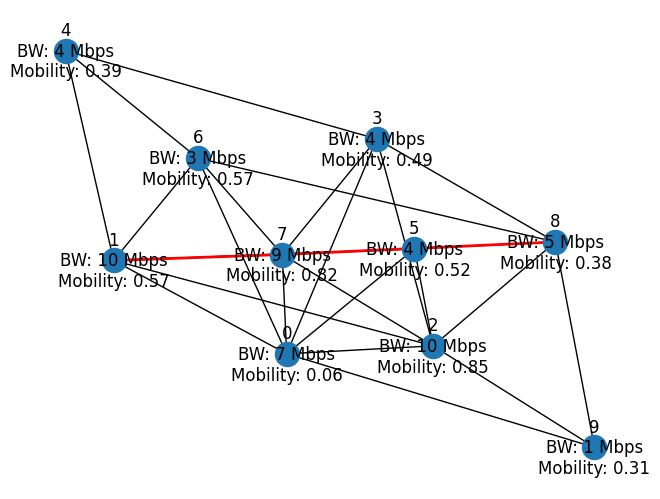

In [119]:
draw_network_graph(G, path, df)

In [120]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
            mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
            transmission_power = min(
                nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power']
            )
            battery_capacity = min(
                nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity']
            )
            packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

            health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "mobility": mobility,
                "transmission_power": transmission_power,
                "battery_capacity": battery_capacity,
                "packet_loss": packet_loss,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))
    
    # Converting the list of dictionaries into a DataFrame
    df2 = pd.DataFrame(data_list)
    return df2


In [121]:
df1 = calculate_avg_health(G, path, df)
df1

avg health of transfer 60.51054965372731


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,1,7,9,0.816587,5.351268,32.518615,0.613511,45.439785
1,7,8,5,0.816587,5.351268,66.955271,0.908638,75.581314


# Genetic Algo

In [122]:
import random
import numpy as np
import networkx as nx


def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            node_props = nodes_df.loc[start_node]
            fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
                'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        node_props = nodes_df.loc[individual[-1]]
        fitness += 1 / node_props['bandwidth'] - node_props['mobility'] + node_props[
            'transmission_power'] + node_props['battery_capacity'] - node_props['packet_loss']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        if len(parent1) > 1 and len(parent2) > 1:
            crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]
            return child1, child2
        else:
            return parent1, parent2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [123]:
source = 0
destination = 5
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, df)
print(f"Path: {path}")

Path: [0, 3, 6, 6, 8, 8, 7, 2, 8, 5, 5]


In [124]:
def draw_network_graph(G, path, nodes_df):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False)
    
    # Draw the path taken by the routing function
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth and mobility from the DataFrame
    labels = {
        i: f"{i}\nBW: {nodes_df.loc[i]['bandwidth']} Mbps\nMobility: {nodes_df.loc[i]['mobility']:.2f}"
        for i in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path, bandwidth, and mobility
    plt.show()


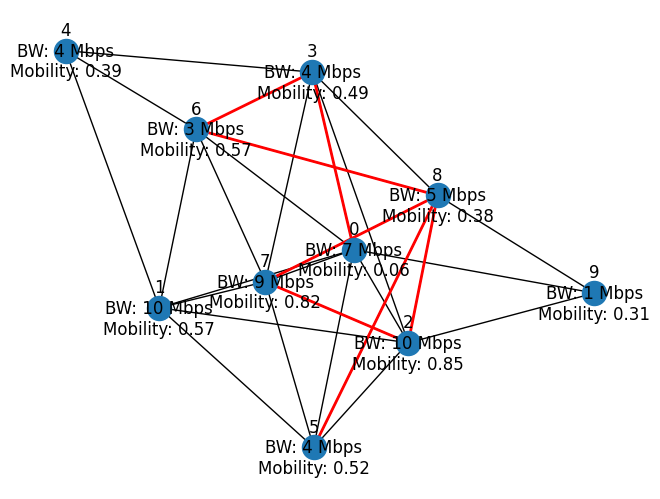

In [125]:
df2 = draw_network_graph(G, path, df)
df2 

In [128]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):

  data_list = []
  total_health = 0
  num_edges = 0

  for i in range(len(path) - 1):
    
    node_a, node_b = path[i], path[i+1]
    
    bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])
    
    mobility = max(nodes_df.loc[node_a]['mobility'], nodes_df.loc[node_b]['mobility'])
    
    transmission_power = min(nodes_df.loc[node_a]['transmission_power'], nodes_df.loc[node_b]['transmission_power'])
    
    battery_capacity = min(nodes_df.loc[node_a]['battery_capacity'], nodes_df.loc[node_b]['battery_capacity'])
    
    packet_loss = max(nodes_df.loc[node_a]['packet_loss'], nodes_df.loc[node_b]['packet_loss'])

    health = bandwidth - mobility + transmission_power + battery_capacity - packet_loss
    
    total_health += health
    num_edges += 1

    data = {
      "node_a": node_a,
      "node_b": node_b,
      "bandwidth": bandwidth,
      "mobility": mobility,
      "transmission_power": transmission_power,
      "battery_capacity": battery_capacity,  
      "packet_loss": packet_loss,
      "health": health
    }
    
    data_list.append(data)

  avg_health = total_health / num_edges if num_edges > 0 else 0

  print("Avg health: ", avg_health)  

  df = pd.DataFrame(data_list)
  return df

In [129]:
df3 = calculate_avg_health(G, path, df)
df3 

Avg health:  61.57598349309294


,node_a,node_b,bandwidth,mobility,transmission_power,battery_capacity,packet_loss,health
0,0,3,4,0.487287,10.938675,17.528688,0.866856,31.113221
1,3,6,3,0.570183,10.938675,19.766252,0.651338,32.483406
2,6,6,3,0.570183,17.969427,19.766252,0.651338,39.514158
3,6,8,3,0.570183,5.631933,19.766252,0.908638,26.919365
4,8,8,5,0.376564,5.631933,66.955271,0.908638,76.302002
5,8,7,5,0.816587,5.351268,66.955271,0.908638,75.581314
6,7,2,9,0.854743,5.351268,80.800055,0.838067,93.458513
7,2,8,5,0.854743,5.631933,66.955271,0.908638,75.823824
8,8,5,4,0.517475,5.631933,66.955271,0.908638,75.161092
9,5,5,4,0.517475,13.106813,72.869993,0.056390,89.402941
